# ASSIGNMENT -1 [ MACHINE LEARNING]


## DECISION TREE  AND RANDOM FOREST.



# Importing the modules.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error




In [6]:
car_data =pd.read_csv("CarPrice.csv")
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualisation [EDA]

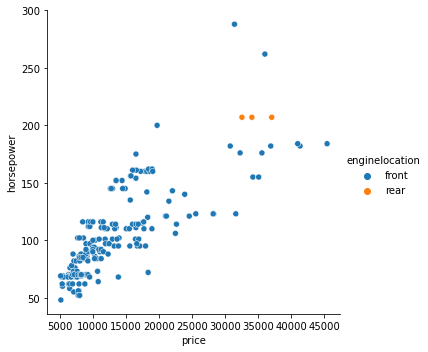

In [9]:
# plot at least 2 EDA:

sns.relplot(y='horsepower',x='price',data=car_data,hue="enginelocation")

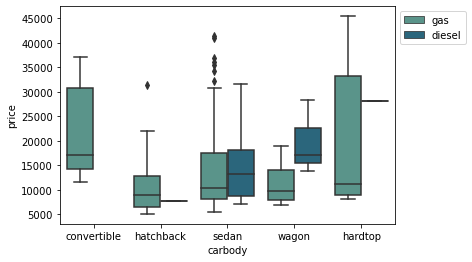

In [10]:
sns.boxplot(y='price',x='carbody',data=car_data,hue="fueltype",palette='crest')
plt.legend(loc=2,bbox_to_anchor=(1,1))

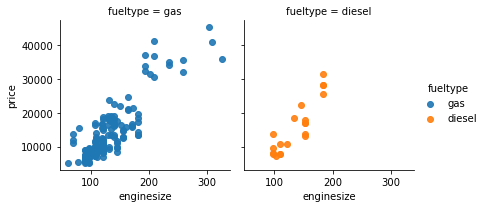

In [11]:

scat = sns.FacetGrid(car_data, col = "fueltype", hue = "fueltype")
scat.map(plt.scatter, "enginesize", "price", alpha =.9)

scat.add_legend();

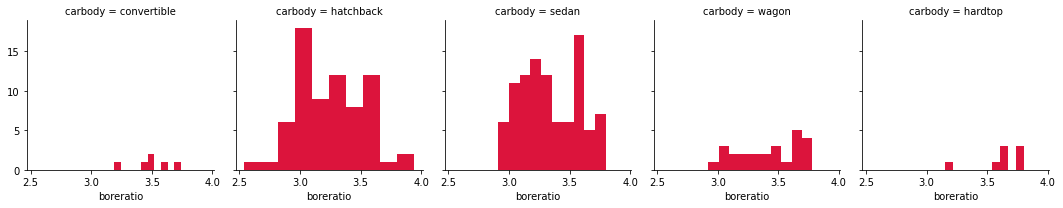

In [12]:
from seaborn.utils import plt

h= sns.FacetGrid(car_data, col = "carbody")
h.map(plt.hist, "boreratio",color='crimson')

# Preparing the data for the model building

In [13]:
d_cardata=car_data.drop(["CarName","car_ID"],axis =1)
d_cardata

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
#Encodind the data using get_dummies

encode= pd.get_dummies(data=d_cardata,columns=["carbody","drivewheel","enginelocation","fueltype","aspiration","cylindernumber","enginetype","doornumber","fuelsystem"])
encode

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber_four,doornumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


In [15]:
encode.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'doornumber_four', 'doornumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [16]:
y = car_data['price']
y


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [17]:
#Removing the label from the original data.

x = encode.drop('price',axis=1)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber_four,doornumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,1,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


In [18]:
#splitting the test and train


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [19]:
#shape of the train and test data.

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((143, 52), (143,), (62, 52), (62,))

In [20]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber_four,doornumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
77,2,93.7,157.3,64.4,50.8,1944,92,2.97,3.230,9.40,...,0,1,0,1,0,0,0,0,0,0
153,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.030,9.00,...,1,0,0,1,0,0,0,0,0,0
143,0,97.2,172.0,65.4,52.5,2340,108,3.62,2.640,9.00,...,1,0,0,0,0,0,0,1,0,0
57,3,95.3,169.0,65.7,49.6,2385,70,3.33,3.255,9.40,...,0,1,0,0,1,0,0,0,0,0
131,2,96.1,176.8,66.6,50.5,2460,132,3.46,3.900,8.70,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.070,9.31,...,0,1,0,0,0,0,0,1,0,0
33,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.410,9.20,...,0,1,1,0,0,0,0,0,0,0
109,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.190,8.40,...,1,0,0,0,0,0,0,1,0,0
139,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.640,8.70,...,0,1,0,1,0,0,0,0,0,0


In [21]:
x_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,doornumber_four,doornumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
113,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,...,1,0,0,0,0,0,0,1,0,0
170,2,98.4,176.2,65.6,52.0,2679,146,3.62,3.50,9.3,...,0,1,0,0,0,0,0,1,0,0
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,...,0,1,0,0,0,0,0,1,0,0
73,0,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,...,1,0,0,0,0,0,0,1,0,0
145,0,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,7.7,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1,102.4,175.6,66.5,54.9,2326,122,3.31,3.54,8.7,...,1,0,0,0,0,0,0,1,0,0
61,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,...,0,1,0,1,0,0,0,0,0,0
16,0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,...,0,1,0,0,0,0,0,1,0,0
103,0,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,...,1,0,0,0,0,0,0,1,0,0


In [22]:
y_train

77      6189.0
153     6918.0
143     9960.0
57     13645.0
131     9895.0
        ...   
132    11850.0
33      6529.0
109    12440.0
139     7053.0
176    10898.0
Name: price, Length: 143, dtype: float64

In [23]:
y_test

113    16695.0
170    11199.0
12     20970.0
73     40960.0
145    11259.0
        ...   
173     8948.0
61     10595.0
16     41315.0
103    13499.0
112    16900.0
Name: price, Length: 62, dtype: float64

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 77 to 176
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              143 non-null    int64  
 1   wheelbase              143 non-null    float64
 2   carlength              143 non-null    float64
 3   carwidth               143 non-null    float64
 4   carheight              143 non-null    float64
 5   curbweight             143 non-null    int64  
 6   enginesize             143 non-null    int64  
 7   boreratio              143 non-null    float64
 8   stroke                 143 non-null    float64
 9   compressionratio       143 non-null    float64
 10  horsepower             143 non-null    int64  
 11  peakrpm                143 non-null    int64  
 12  citympg                143 non-null    int64  
 13  highwaympg             143 non-null    int64  
 14  carbody_convertible    143 non-null    uint8  
 15  carbo

In [25]:
#indexing to remove the dummies from being scaled.

index_train=x_train.iloc[:,:13]
index_test=x_test.iloc[:,:13]

In [26]:
#scaling

ss=StandardScaler()
#x_train.iloc[:,:13].values=ss.fit_transform(x_train.iloc[:,:13].values)
x_scale_train=ss.fit_transform(index_train.values)
x_scale_test= ss.fit_transform(index_test)

# Decision Tree 

In [27]:
#Decision tree

DT= DecisionTreeRegressor()
DT.fit(x_scale_train,y_train)
pred=DT.predict(x_scale_test)

In [28]:
pd.DataFrame(zip(y_test,pred),columns=["actual DT(y)","Predicted DT(y^)"])

,actual DT(y),Predicted DT(y^)
0,16695.0,18920.0
1,11199.0,9989.0
2,20970.0,24565.0
3,40960.0,45400.0
4,11259.0,11694.0
...,...,...
57,8948.0,10898.0
58,10595.0,8845.0
59,41315.0,30760.0
60,13499.0,17199.0


In [30]:
#MODEL EVALUATION OF DECISION TREE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE=round(mean_absolute_error(y_test,pred),4)
MSE=round(mean_squared_error(y_test,pred),4)
import math
RMSE=round(np.sqrt(MSE),4)
r2= round(r2_score(y_test,pred),4)

print("Mean Absolute Error:",MAE)
print("Mean Squared Error:",MSE)
print("Root Mean squared Error:",RMSE)
print("R squared:",r2)


Mean Absolute Error: 2408.0323
Mean Squared Error: 11379313.3548
Root Mean squared Error: 3373.3238
R squared: 0.823


# Random Forest Regressor.

In [31]:
#RANDOM FOREST REGRESSOR.

ran_for=RandomForestRegressor()
ran_for.fit(x_scale_train,y_train)

RandomForestRegressor()

In [32]:
#PREDICTING THE RANDOM FOREST

RF_pred=ran_for.predict(x_scale_test)
print(RF_pred)

[16649.64       11197.09       17150.79       39435.875
 11236.          6129.09233333 17476.78       18948.82835
  8377.22        6357.7625     14747.33167     7546.65
 20333.66        9474.77        6531.39666667  9161.15
 14441.49        8775.67       10660.81       10973.615
  6952.44       14948.12334     6571.63166667 17710.30334
  6656.57166667 19443.395      18890.4         6811.25166667
  6737.08       10448.93       14785.24167     7435.92
  6145.54166667 16123.35        6007.23166667  8068.12
  9656.675       6336.16        7796.4275      8352.655
 11004.87       17446.14501     8284.61        7121.08
  9173.2        16098.25167    32833.965       7913.785
 17743.18        7242.02       13050.04       18597.27334
  7495.01166667 15135.6        17468.99501    35064.35
  8360.09        9770.98        8992.08833333 34983.14667
 17334.19668    18840.71      ]


In [33]:
pd.DataFrame(zip(y_test,RF_pred),columns=["actual value(y)","Predicted Value(y^)"])

,actual value(y),Predicted Value(y^)
0,16695.0,16649.640000
1,11199.0,11197.090000
2,20970.0,17150.790000
3,40960.0,39435.875000
4,11259.0,11236.000000
...,...,...
57,8948.0,9770.980000
58,10595.0,8992.088333
59,41315.0,34983.146670
60,13499.0,17334.196680


In [34]:
# MODEL EVALUATION FOR RANDOM FOREST REGRESSOR.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RF_MAE=round(mean_absolute_error(y_test,RF_pred),4)
RF_MSE=round(mean_squared_error(y_test,RF_pred),4)
import math
RF_RMSE=round(np.sqrt(RF_MSE),4)
RF_r2= round(r2_score(y_test,RF_pred),4)

print("Mean Absolute Error:",MAE)
print("Mean Squared Error:",MSE)
print("Root Mean squared Error:",RMSE)
print("R squared:",RF_r2)


Mean Absolute Error: 2408.0323
Mean Squared Error: 11379313.3548
Root Mean squared Error: 3373.3238
R squared: 0.9052


# Comparing performance of Models:

In [36]:
eva= [["Mean_absolute_error",MAE,RF_MAE],
      ["Mean_squared_error",MSE,RF_MSE],
      ["Root_Mean_squared_error",RMSE,RF_RMSE],
      ["r2_score",r2,RF_r2,2]]
eva



[['Mean_absolute_error', 2408.0323, 1636.5969],
 ['Mean_squared_error', 11379313.3548, 6095996.0394],
 ['Root_Mean_squared_error', 3373.3238, 2469.0071],
 ['r2_score', 0.823, 0.9052, 2]]

# Result

Comparing the models, it is revealed that Random Forest is the best model than the decision tree model.

The reason is Random Forest model gives R2 score of 0.89 whereas Decision Tree's r2 score is 0.81 